# Part 1) Load the data and make a datetime index.

In [23]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot  as plt  
import seaborn as sns  
import matplotlib 
import datetime as dt #%%SVG
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [24]:
import pandas as pd  
# path   = 'london_weather_MODIFIED - london_weather_MODIFIED (1).csv'
path = 'london_weather.csv' # added by Khalid
df = pd.read_csv(path)
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [25]:
# df['date']= pd.to_datetime(df['date'], format="%Y%m%d")#.dt.strftime('%y %m %d')
# df['date']
df['datetime'] = pd.to_datetime(df['date'], format="%Y%m%d")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


In [27]:
# df['y']= df['datetime'].dt.strftime('%y')
# df = df.set_index('datetime')
# df['y']

df.set_index('datetime', inplace=True)

In [28]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=15341, freq=None)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.3 MB


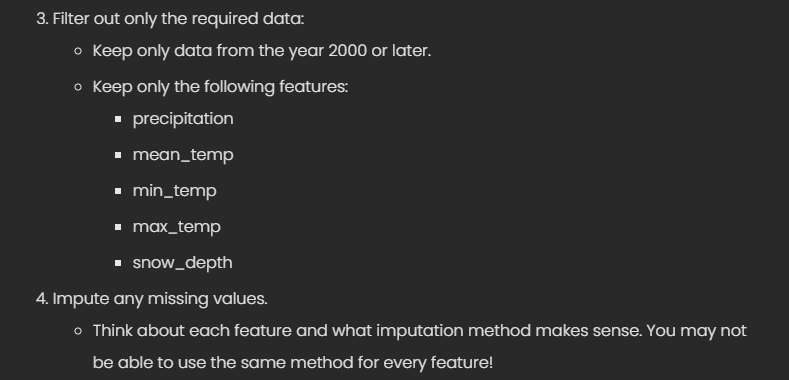

In [30]:
df=df.loc['2000':, ['max_temp','mean_temp','precipitation','min_temp','snow_depth']] 
df

,max_temp,mean_temp,precipitation,min_temp,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,0.0,4.9,0.0
2000-01-02,11.5,7.9,0.2,5.0,0.0
2000-01-03,9.5,9.4,6.0,7.2,0.0
2000-01-04,11.0,7.0,0.2,4.4,0.0
2000-01-05,10.8,6.4,0.8,1.9,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,2.0,7.6,NaN
2020-12-28,3.6,1.1,0.2,-1.3,NaN
2020-12-29,4.1,2.6,0.0,1.1,NaN


In [31]:
# impute any missing  value  

df['max_temp'] =df['max_temp'].interpolate(method = 'linear')
df['mean_temp']= df['mean_temp'].interpolate(method = 'linear')
df['min_temp']=df['min_temp'].interpolate(method = 'linear')
df['precipitation']= df['precipitation'].fillna(method='ffill')
df['snow_depth']= df['snow_depth'].fillna(method='ffill')      

In [32]:
df.isna().sum()

max_temp         0
mean_temp        0
precipitation    0
min_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

## Q1: What month had the most precipitation between 2000 through 2010?

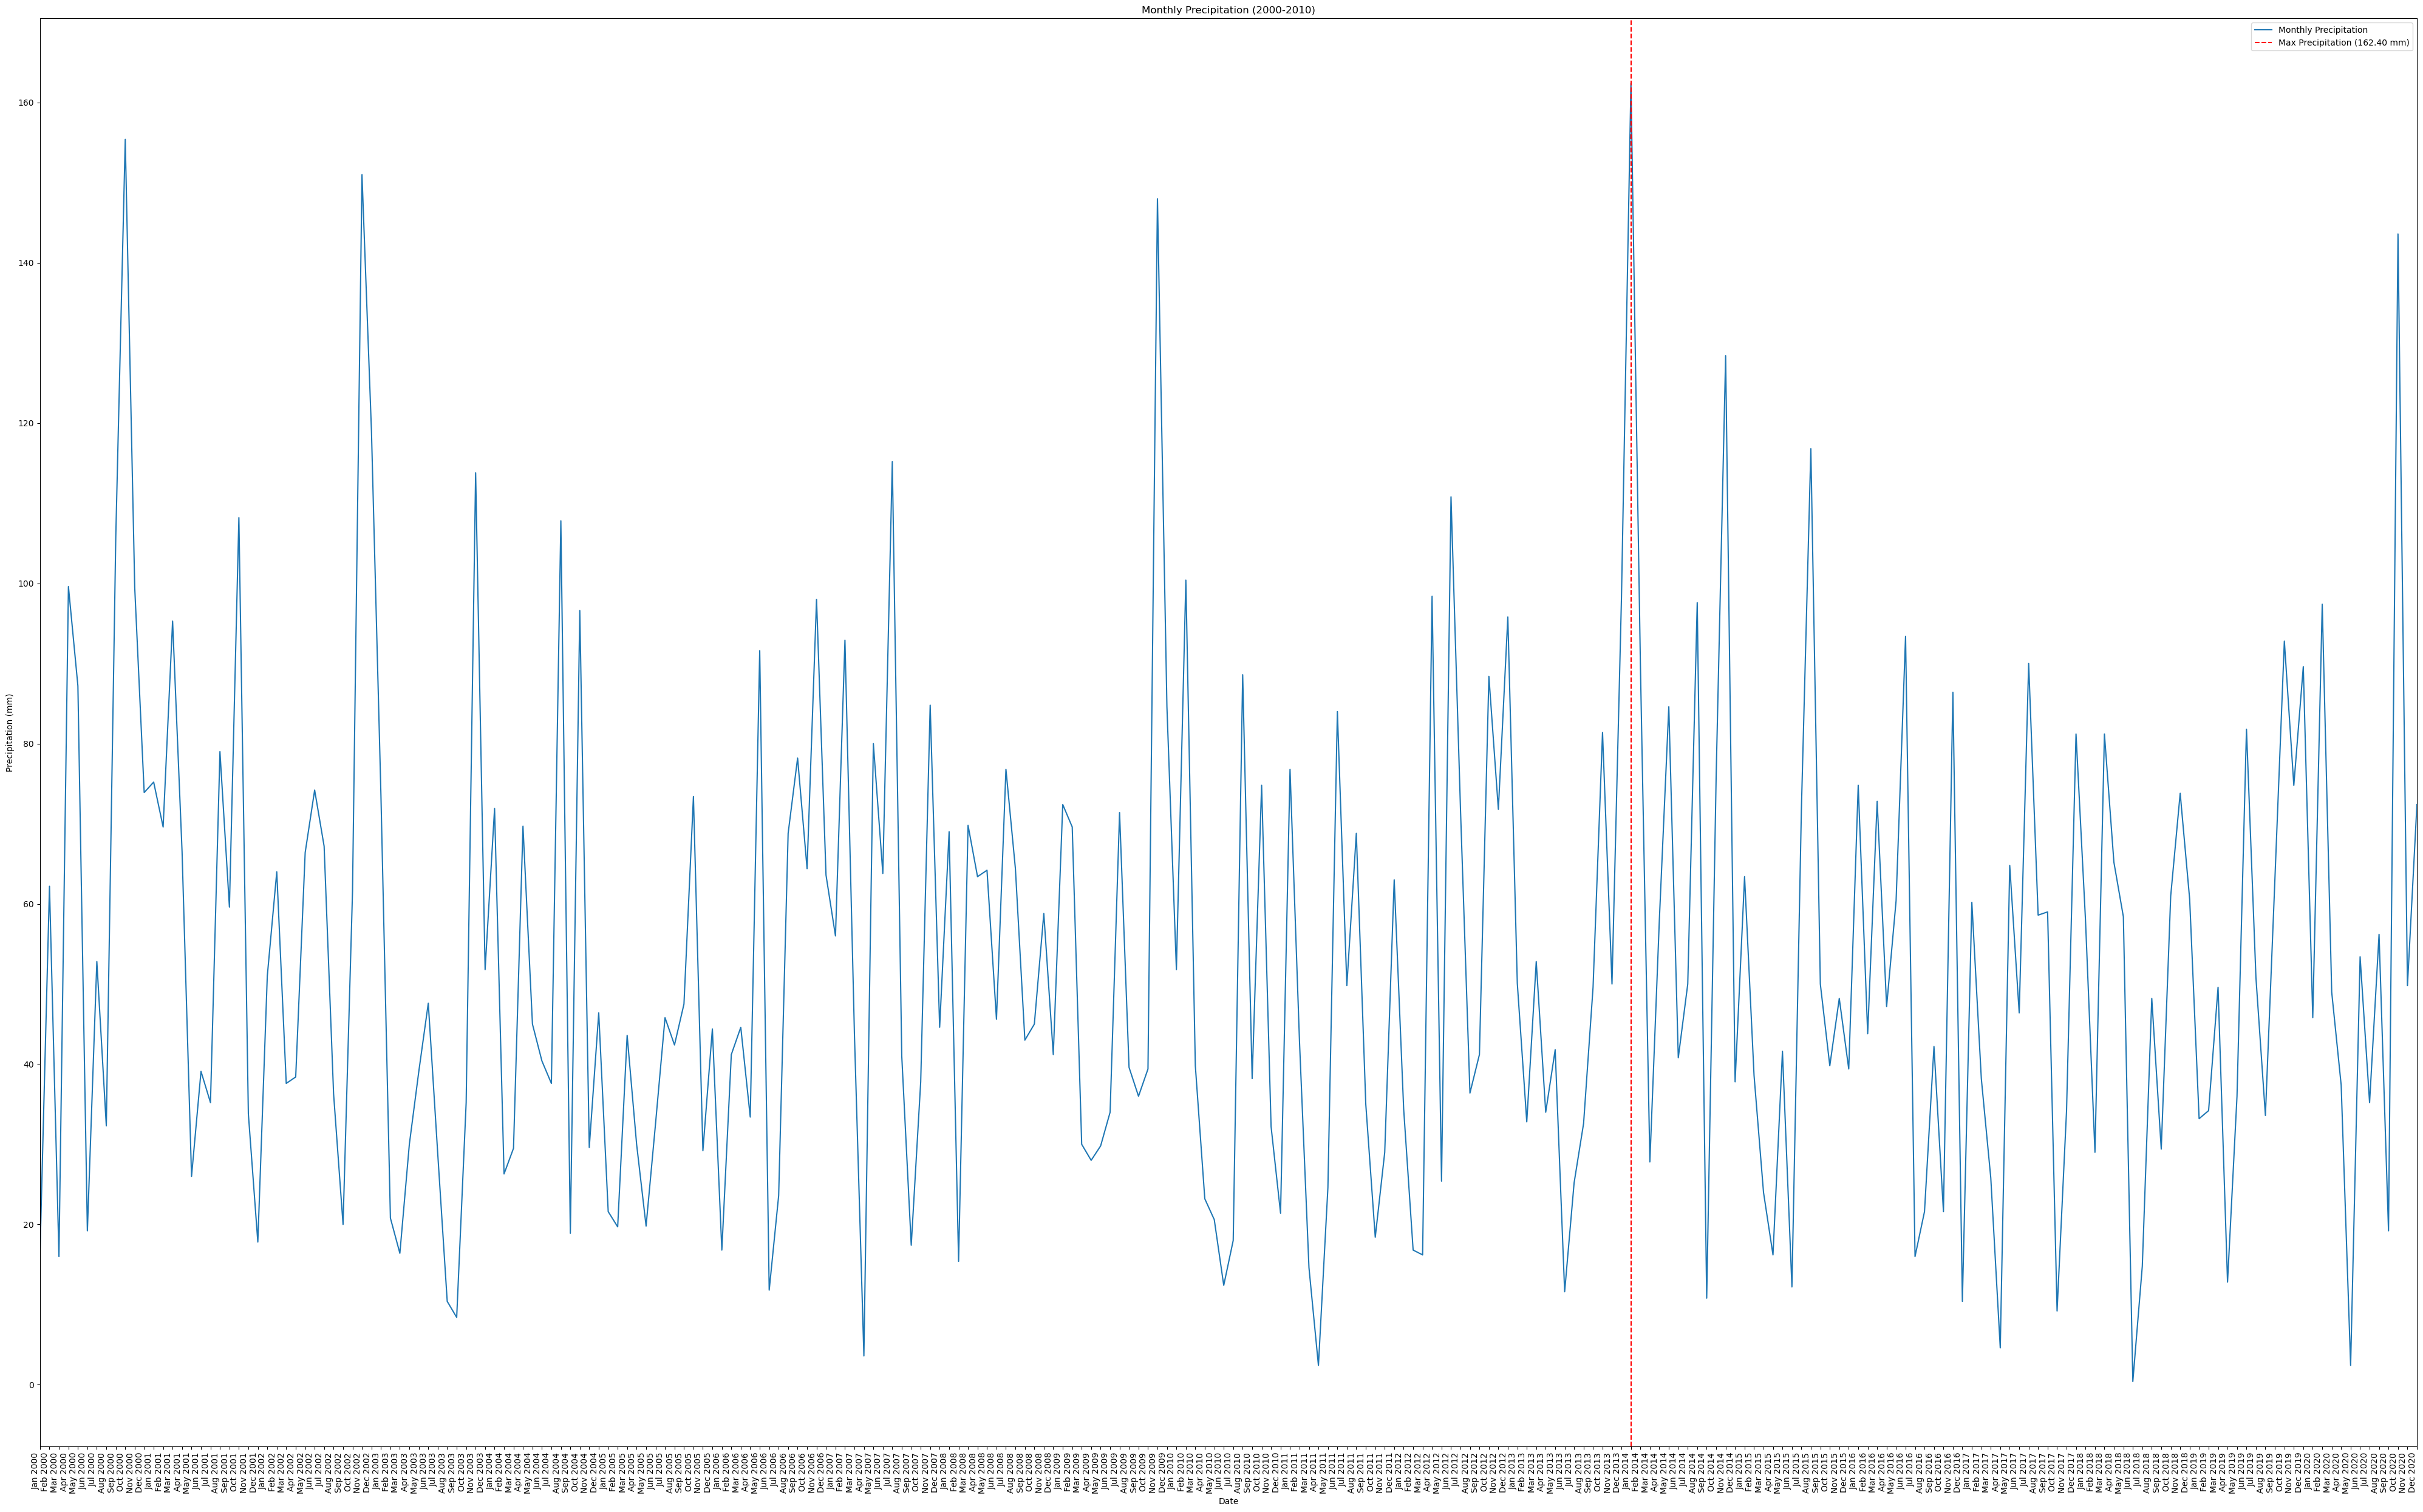

In [51]:
df = df[df.index.year >= 2000]
selected_features = ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']
df = df[selected_features]
df.fillna(method='ffill', inplace=True)  
monthly_precipitation = df['precipitation'].resample('M').sum()
max_precipitation = monthly_precipitation.max()
max_precipitation_date = monthly_precipitation.idxmax()


fig, ax = plt.subplots(figsize=(40, 25))
monthly_precipitation.plot(ax=ax, label='Monthly Precipitation')
ax.axvline(max_precipitation_date, color='red', linestyle='--', label=f'Max Precipitation ({max_precipitation:.2f} mm)')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (mm)')
ax.set_title('Monthly Precipitation (2000-2010)')
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))

ax.legend()
ax.set_xticks(monthly_precipitation.index)
ax.set_xticklabels([dt.strftime('%b %Y') for dt in monthly_precipitation.index], rotation=90, ha='right')

plt.tight_layout()
plt.show()


## Q2: Which year between 2000-2020 had the coolest average temperature?

In [52]:
mean_temperature = df['mean_temp']
temperature = mean_temperature['2000': , ]

In [64]:
coolest_temperature = temperature.resample('A').mean()
coolest_temperature


datetime
2000-12-31    11.582514
2001-12-31    11.339452
2002-12-31    12.084384
2003-12-31    12.138356
2004-12-31    11.868579
2005-12-31    11.825479
2006-12-31    12.299589
2007-12-31    11.926575
2008-12-31    11.347268
2009-12-31    11.736438
2010-12-31    10.635890
2011-12-31    12.378082
2012-12-31    11.329781
2013-12-31    11.164110
2014-12-31    12.660000
2015-12-31    12.137260
2016-12-31    11.919126
2017-12-31    12.210685
2018-12-31    12.529315
2019-12-31    12.193973
2020-12-31    12.729781
Freq: A-DEC, Name: mean_temp, dtype: float64

In [65]:
# Determine the year and value for the lowest mean temp. 
temp_date= coolest_temperature.idxmin()
temp_low = coolest_temperature.min()
print(temp_date)
print(temp_low)

2010-12-31 00:00:00
10.635890410958904


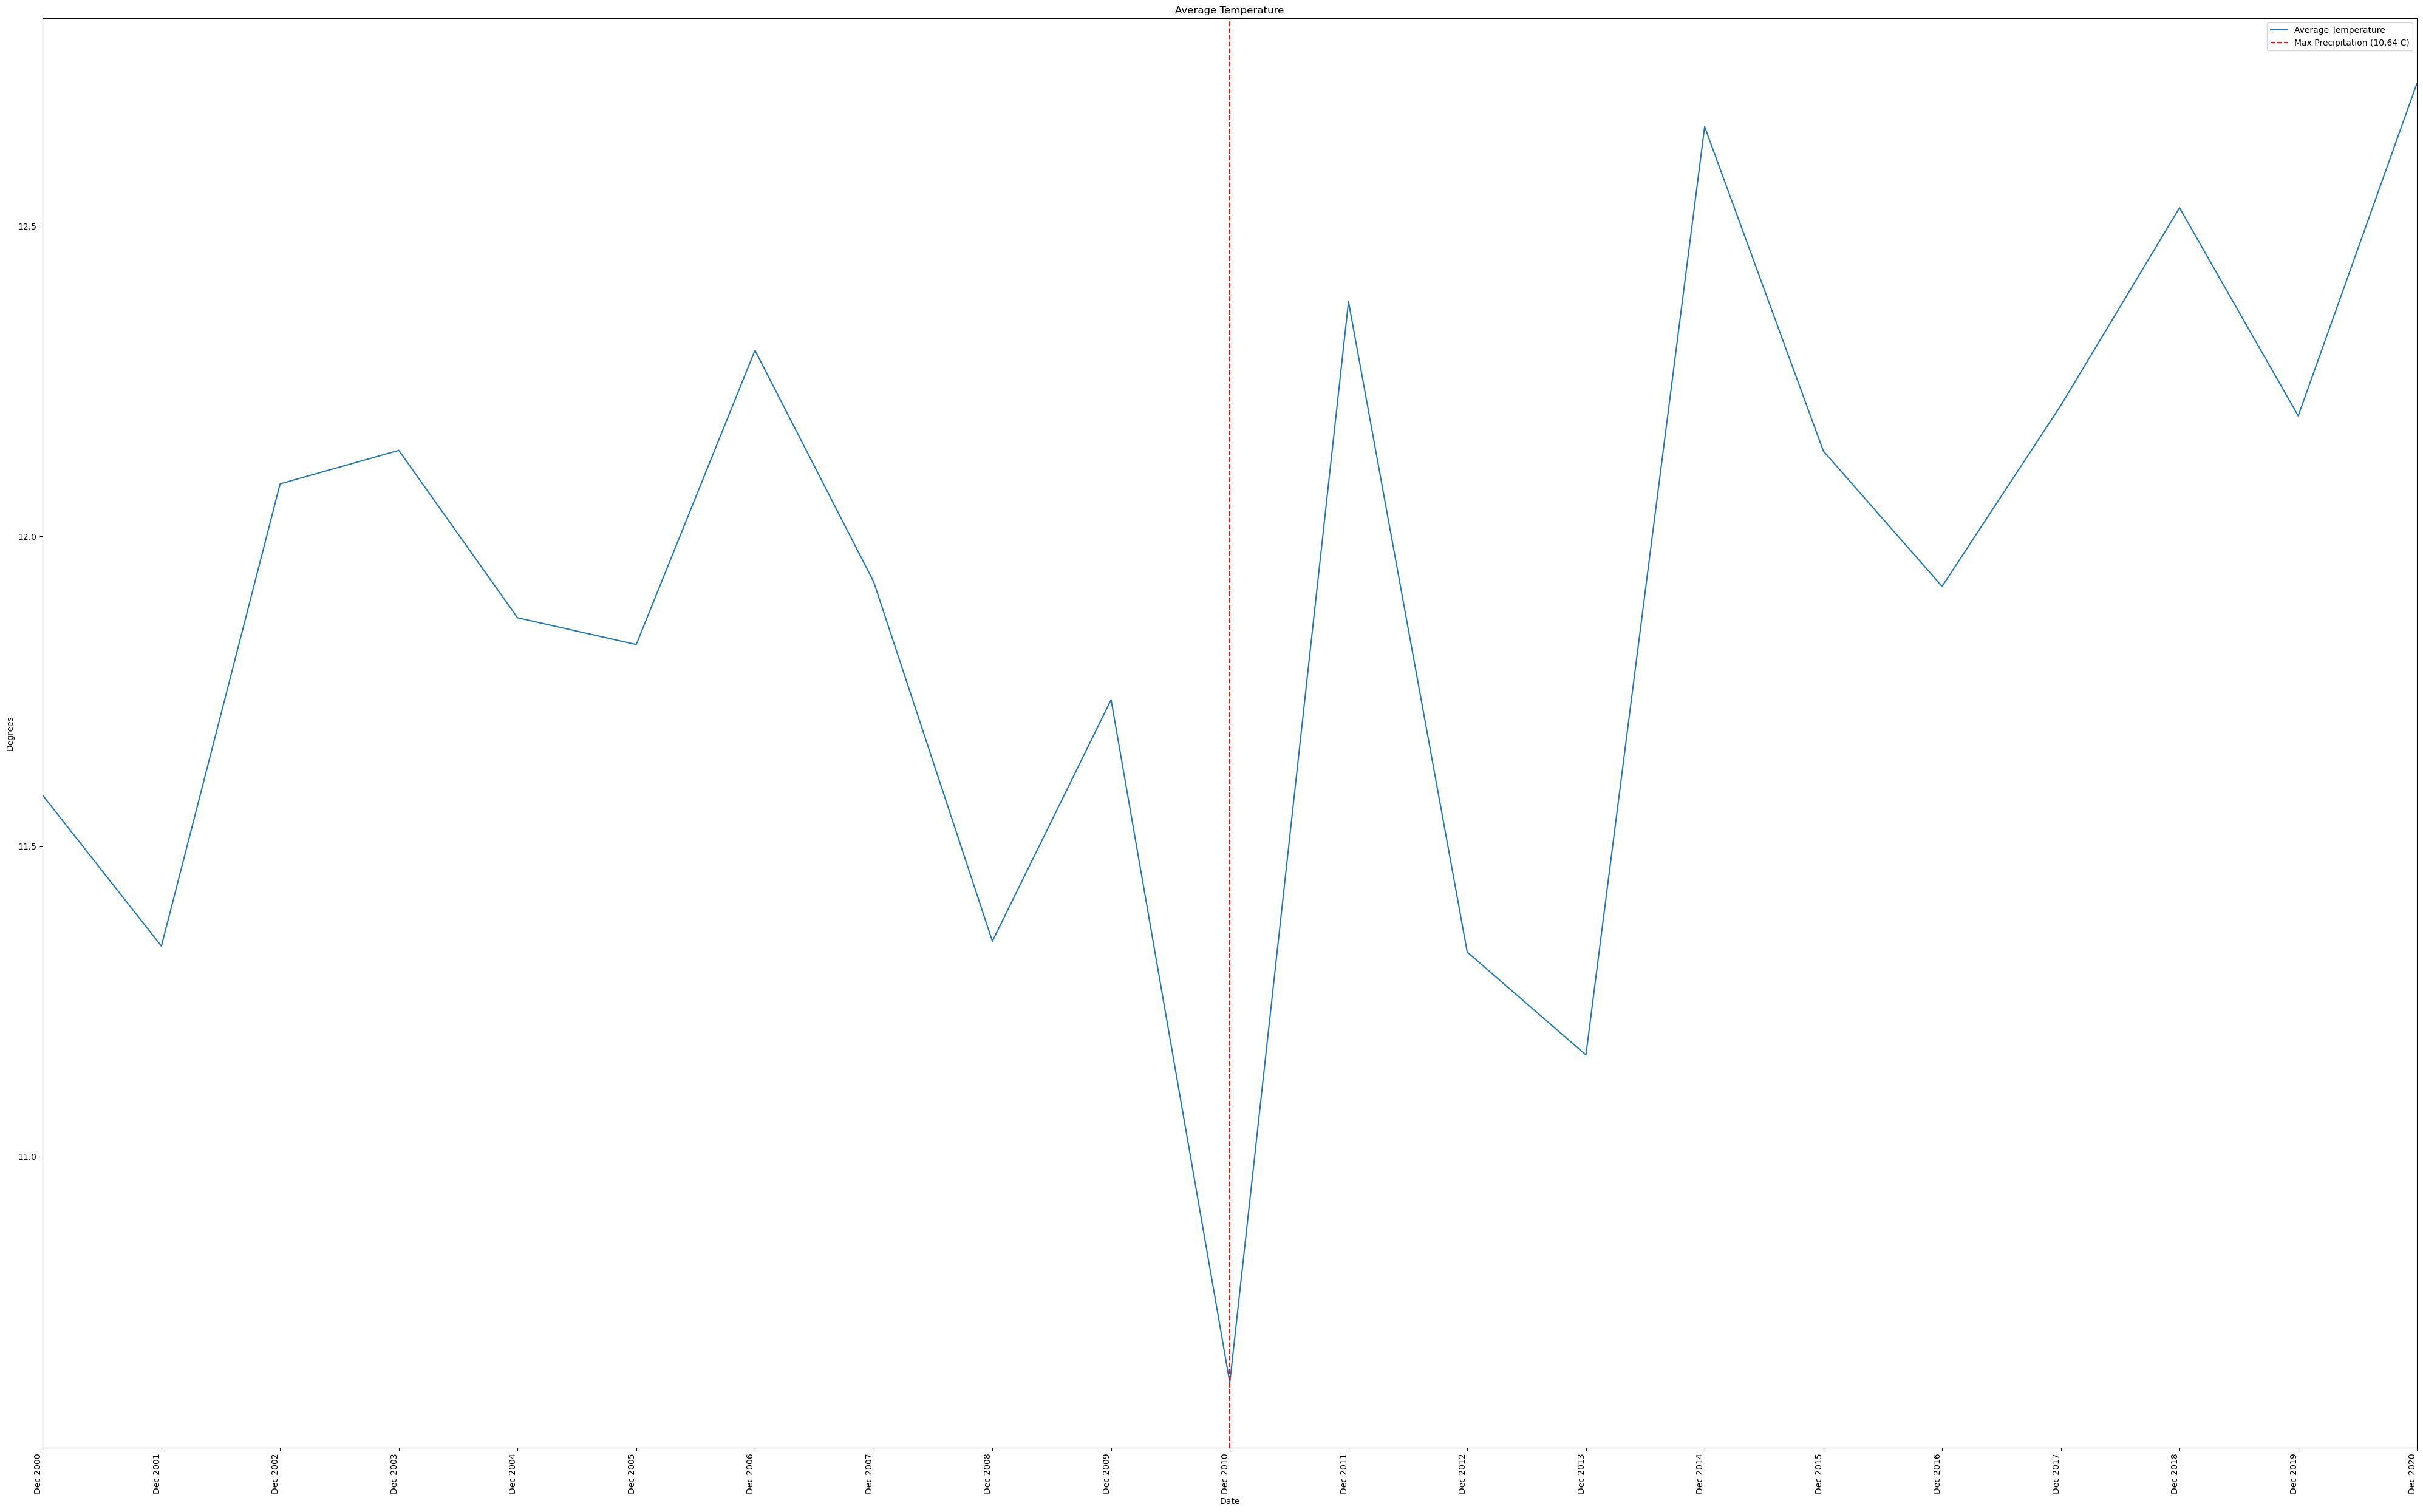

In [66]:
fig, ax = plt.subplots(figsize=(40, 25))
coolest_temperature.plot(ax=ax, label='Average Temperature')
ax.axvline(temp_date, color='red', linestyle='--', label=f'Max Precipitation ({temp_low:.2f} C)')
ax.set_xlabel('Date')
ax.set_ylabel('Degrees')
ax.set_title('Average Temperature')
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))

ax.legend()
ax.set_xticks(coolest_temperature.index)
ax.set_xticklabels([dt.strftime('%b %Y') for dt in coolest_temperature.index ], rotation=90, ha='right')

plt.tight_layout()
plt.show()

